In [3]:
import heapq  # For priority queue operations
import networkx as nx  # For creating and visualizing graphs
import matplotlib.pyplot as plt  # For graph plotting


In [4]:
# Define a larger graph with 20+ nodes and 30+ edges
graph = {
    'City1': [('City2', 7), ('City3', 9), ('City6', 14)],
    'City2': [('City1', 7), ('City3', 10), ('City4', 15)],
    'City3': [('City1', 9), ('City2', 10), ('City4', 11), ('City6', 2)],
    'City4': [('City2', 15), ('City3', 11), ('City5', 6)],
    'City5': [('City4', 6), ('City6', 9), ('City7', 8)],
    'City6': [('City1', 14), ('City3', 2), ('City5', 9), ('City8', 4)],
    'City7': [('City5', 8), ('City8', 3), ('City10', 6)],
    'City8': [('City6', 4), ('City7', 3), ('City9', 12)],
    'City9': [('City8', 12), ('City10', 5), ('City11', 7)],
    'City10': [('City7', 6), ('City9', 5), ('City11', 9), ('City12', 3)],
    'City11': [('City9', 7), ('City10', 9), ('City13', 10)],
    'City12': [('City10', 3), ('City14', 11), ('City15', 4)],
    'City13': [('City11', 10), ('City15', 8)],
    'City14': [('City12', 11), ('City15', 2), ('City16', 9)],
    'City15': [('City12', 4), ('City13', 8), ('City14', 2), ('City17', 7)],
    'City16': [('City14', 9), ('City18', 6)],
    'City17': [('City15', 7), ('City19', 5)],
    'City18': [('City16', 6), ('City19', 4), ('City20', 10)],
    'City19': [('City17', 5), ('City18', 4), ('City20', 6)],
    'City20': [('City18', 10), ('City19', 6)],
}


In [5]:
def dijkstra(graph, start):
    # Priority queue to store (distance, vertex) tuples
    pq = [(0, start)]
    # Dictionary to store the shortest distance to each vertex
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    # Dictionary to store the shortest path
    previous = {vertex: None for vertex in graph}

    while pq:
        current_distance, current_vertex = heapq.heappop(pq)

        # If we found a shorter path before, skip this one
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex]:
            distance = current_distance + weight

            # Update the shortest path if a better one is found
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_vertex
                heapq.heappush(pq, (distance, neighbor))

    return distances, previous


In [6]:
def shortest_path(previous, start, goal):
    path = []
    current = goal
    while current is not None:
        path.insert(0, current)
        current = previous[current]
    return path


In [7]:
# Set the start city
start_city = 'City1'

# Run Dijkstra's algorithm
distances, previous = dijkstra(graph, start_city)

# Display the shortest distances from the start city to all other cities
print("Shortest distances from", start_city)
for city, distance in distances.items():
    print(f"Distance to {city}: {distance}")

# Display the shortest path from the start city to a specific destination
destination = 'City20'
path = shortest_path(previous, start_city, destination)
print(f"\nShortest path from {start_city} to {destination}: {' -> '.join(path)}")


Shortest distances from City1
Distance to City1: 0
Distance to City2: 7
Distance to City3: 9
Distance to City4: 20
Distance to City5: 20
Distance to City6: 11
Distance to City7: 18
Distance to City8: 15
Distance to City9: 27
Distance to City10: 24
Distance to City11: 33
Distance to City12: 27
Distance to City13: 39
Distance to City14: 33
Distance to City15: 31
Distance to City16: 42
Distance to City17: 38
Distance to City18: 47
Distance to City19: 43
Distance to City20: 49

Shortest path from City1 to City20: City1 -> City3 -> City6 -> City8 -> City7 -> City10 -> City12 -> City15 -> City17 -> City19 -> City20


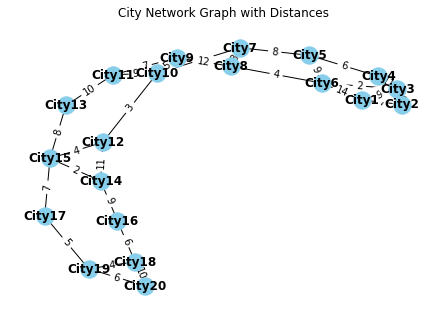

In [8]:
# Create the graph using NetworkX
G = nx.Graph()

# Add edges to the graph
for node, neighbors in graph.items():
    for neighbor, weight in neighbors:
        G.add_edge(node, neighbor, weight=weight)

# Draw the graph with node labels and edge weights
pos = nx.spring_layout(G)  # Positions the nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.title("City Network Graph with Distances")
plt.show()
